IMPORT NECESSARY LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASET

In [2]:
zomato_orgnl=pd.read_csv("zomato.csv")

DATA PRE-PROCESSING

In [3]:
zomato_orgnl.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zomato_orgnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
#Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"
zomato=zomato_orgnl.drop(['url','dish_liked','phone'],axis=1)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
#Renaming "approx_cost(for two people)" ,listed_in(type) and listed_in(city) as they have multiple data-types

zomato.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

In [7]:
#Converting "votes" and "approx_cost_for_2_people" into numeric(int)

remove_comma = lambda x: int(x.replace(',', '')) if type(x) == str and x != np.nan else x 
zomato.votes = zomato.votes.astype('int')
zomato['approx_cost_for_2_people'] = zomato['approx_cost_for_2_people'].apply(remove_comma)

In [8]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
#We remove the restaurent data which has rate='NEW'
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)

In [10]:
#remove '/5'
remove_slash = lambda x: x.replace('/5', '') if type(x) == str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

In [11]:
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
#Label Encode the input variable columns into 0,1,2...
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

In [13]:
zomato_en['rate'] = zomato_en['rate'].fillna(zomato_en['rate'].mean())
zomato_en['approx_cost_for_2_people'] = zomato_en['approx_cost_for_2_people'].fillna(zomato_en['approx_cost_for_2_people'].mean())

In [14]:
zomato_en.isna().sum()


address                     0
name                        0
online_order                0
book_table                  0
rate                        0
votes                       0
location                    0
rest_type                   0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
dtype: int64

DATA VISUALIZATION

In [15]:
#i) correlation among all the x(inputs)
corr = zomato_en.corr(method='kendall')

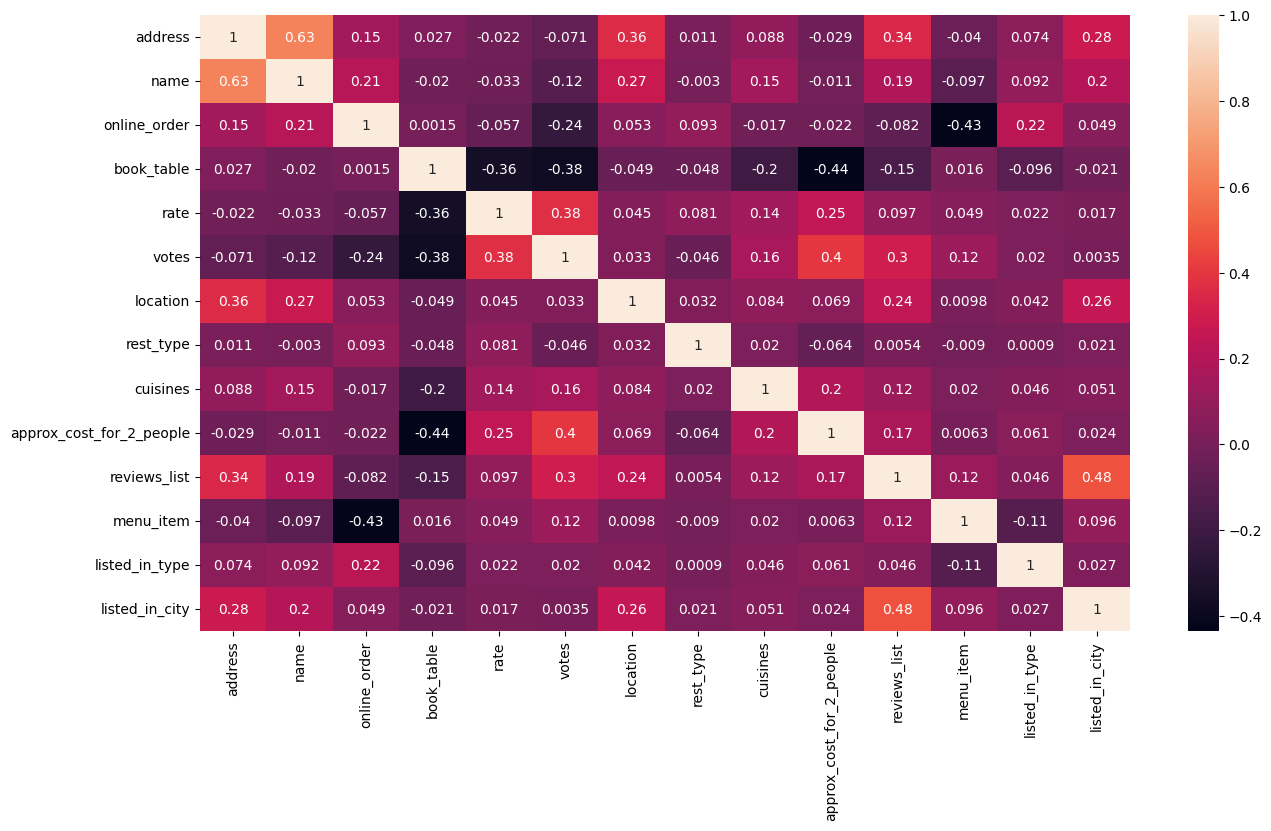

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

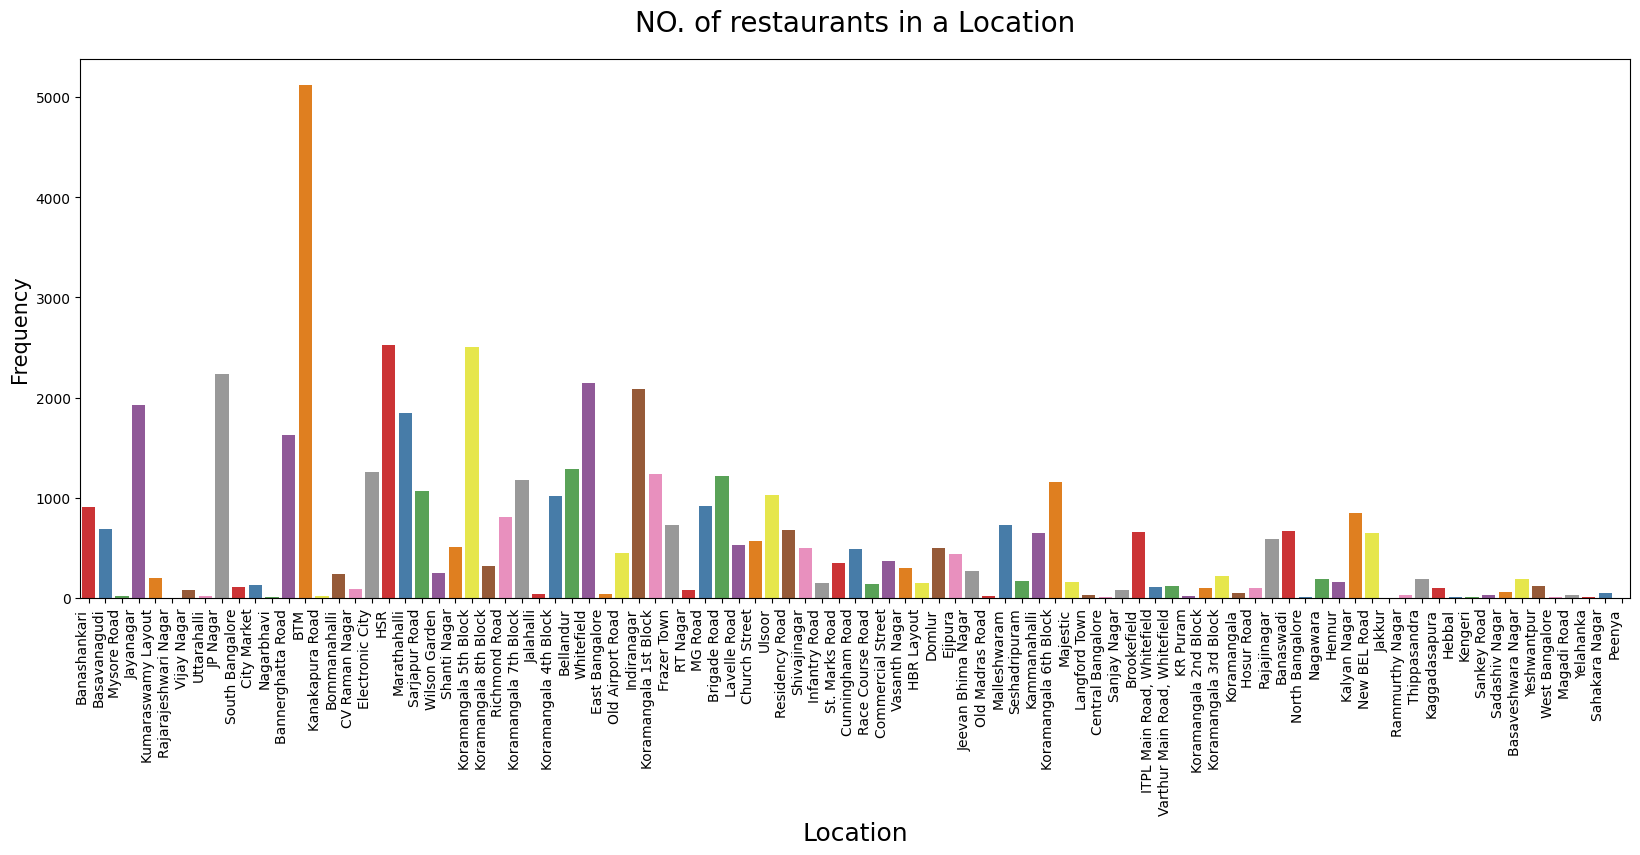

In [ ]:
#ii) No. of restaurants in a particular location

fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_orgnl, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
plt.title('NO. of restaurants in a Location',size = 20,pad=20)
plt.show()

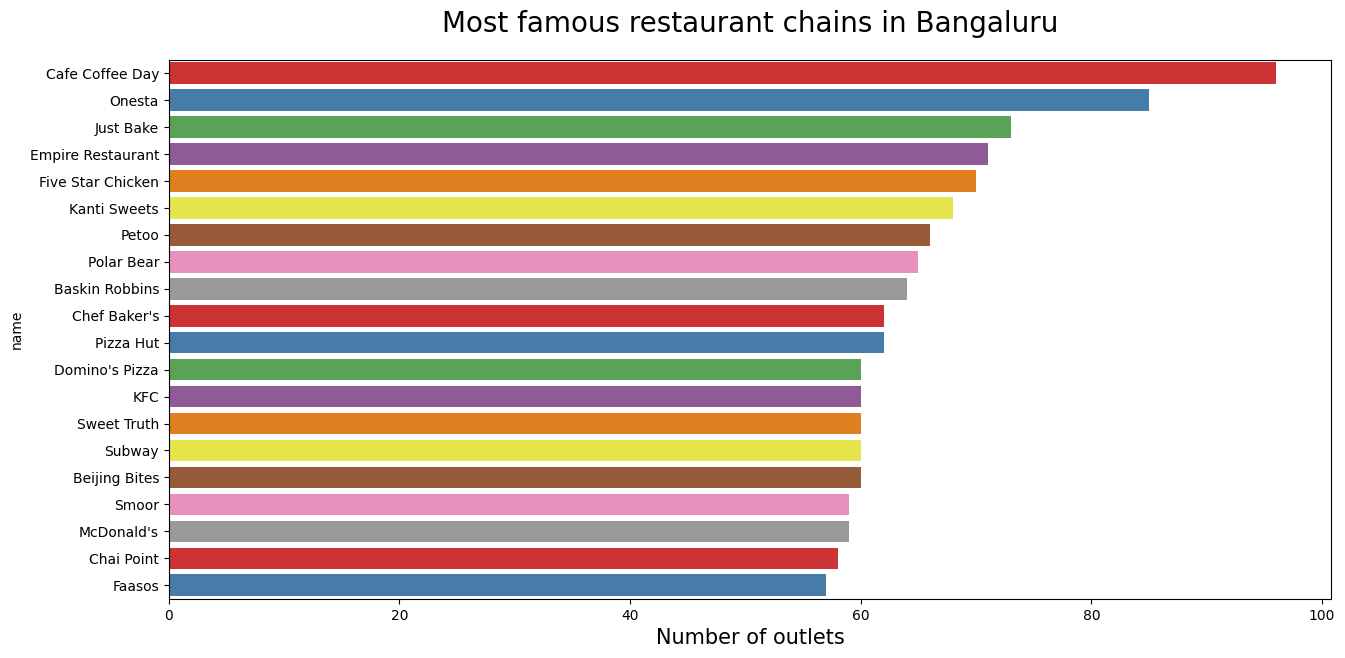

In [ ]:
#iii) Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=zomato_orgnl['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()

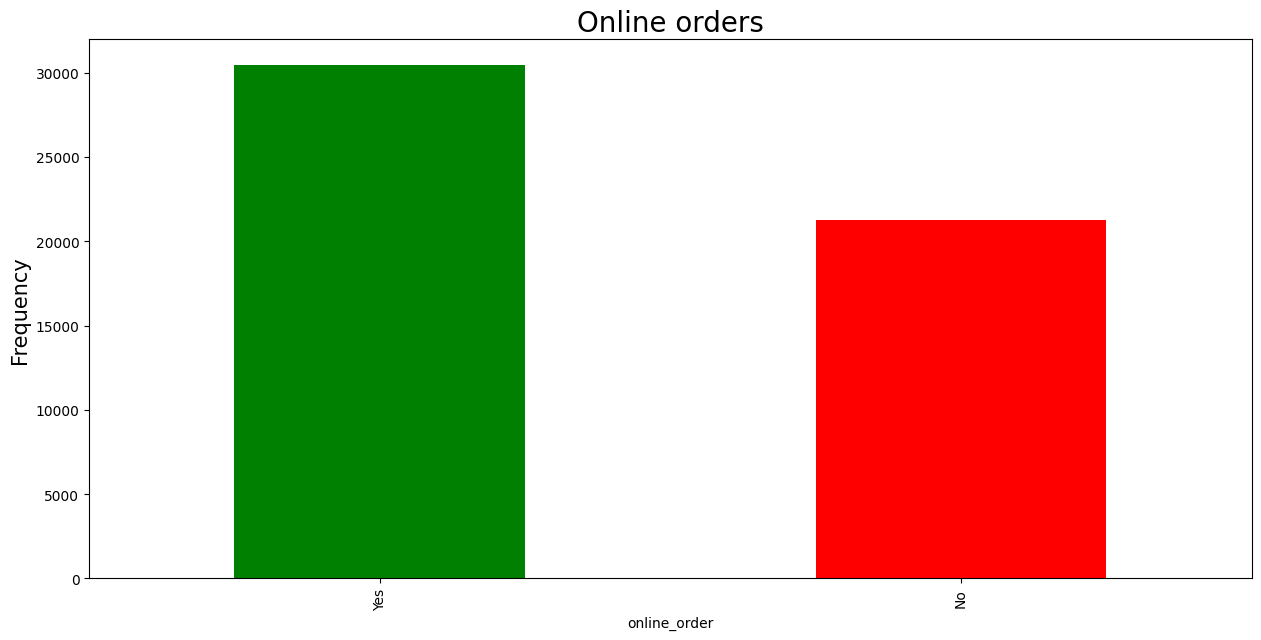

In [ ]:
#iv) Number of restaurants taking online order or not
plt.figure(figsize=(15,7))
zomato_orgnl['online_order'].value_counts().plot.bar(color=['green', 'red'])
plt.title('Online orders', fontsize = 20)
plt.ylabel('Frequency',size = 15)
plt.show()

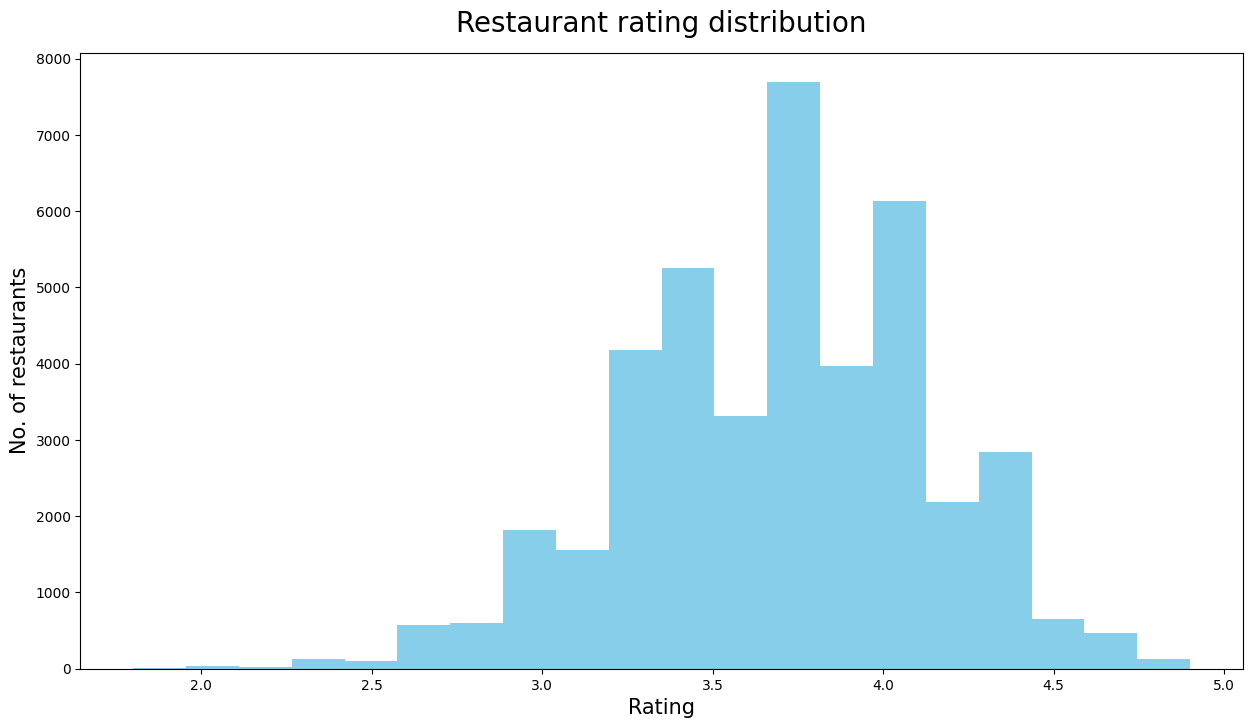

In [ ]:
# v) Restaurant rating distribution
plt.figure(figsize=(15,8))
rating = zomato['rate']
plt.hist(rating,bins=20,color="skyblue")
plt.title('Restaurant rating distribution', size = 20, pad = 15)
plt.xlabel('Rating',size = 15)
plt.ylabel('No. of restaurants',size = 15)
plt.show()

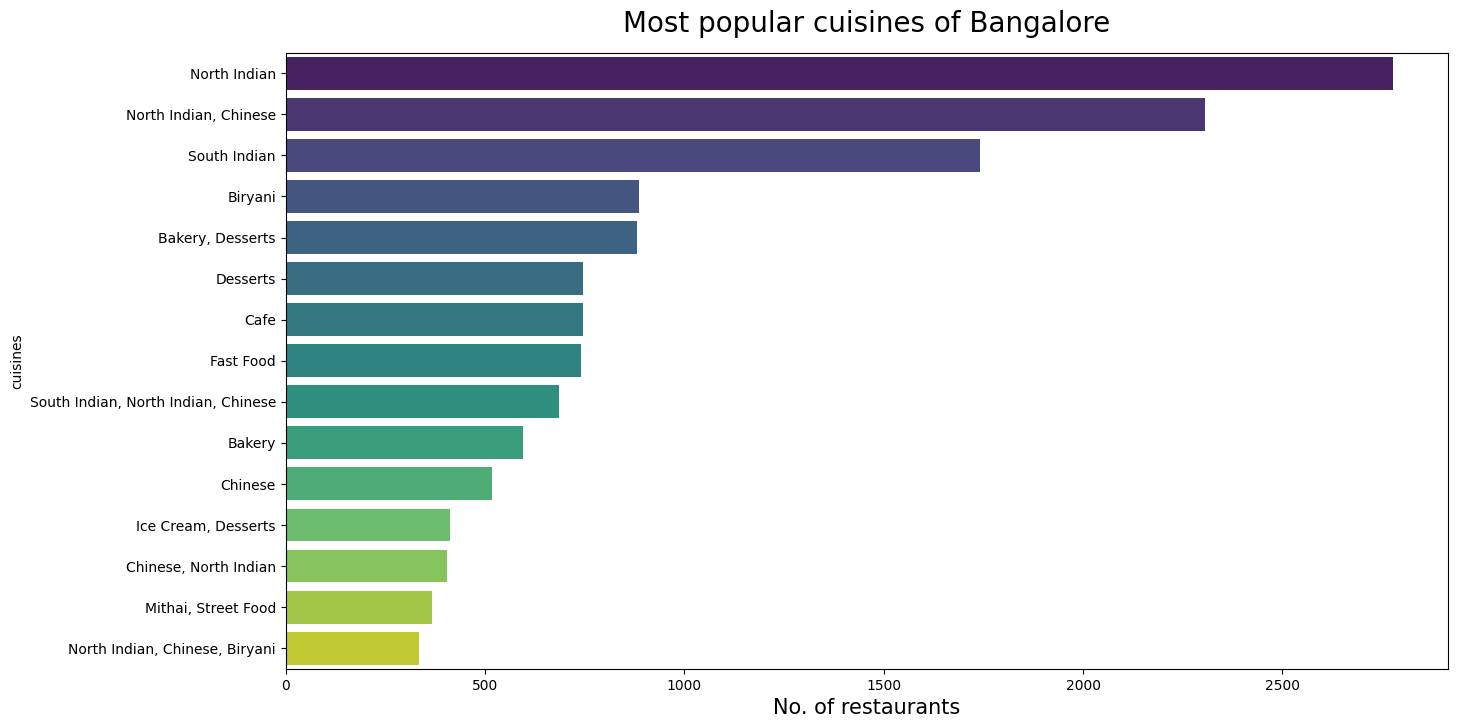

In [ ]:
#vi) Most popular cuisines of Bangalore

plt.figure(figsize=(15,8))
cuisines=zomato['cuisines'].value_counts()[:15]
sns.barplot(x=cuisines, y=cuisines.index, palette='viridis')
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)
plt.show()

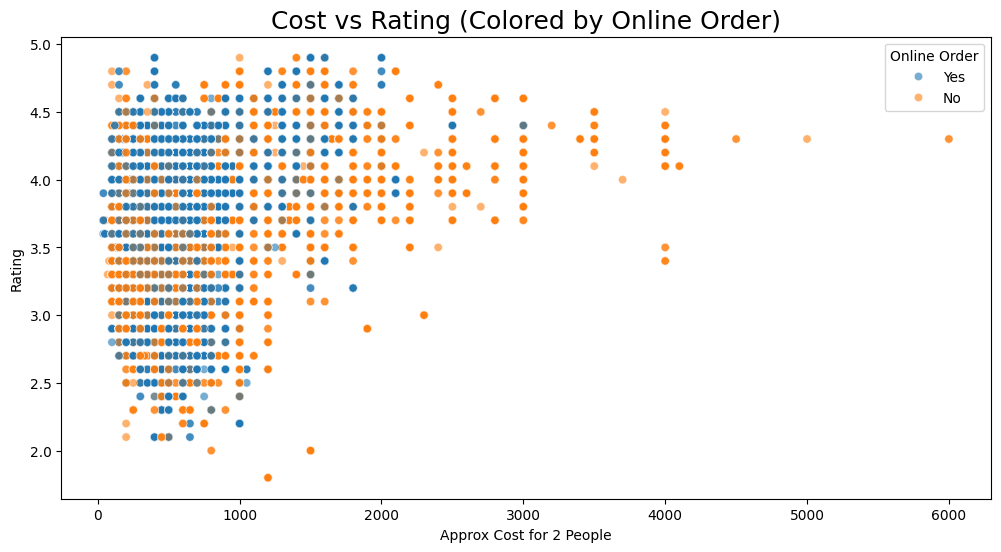

In [ ]:
#vii) Relationship between cost and rating
plt.figure(figsize=(12,6))
sns.scatterplot(x='approx_cost_for_2_people', y='rate', data=zomato, alpha=0.6, hue='online_order')
plt.title('Cost vs Rating (Colored by Online Order)', size=18)
plt.xlabel('Approx Cost for 2 People')
plt.ylabel('Rating')
plt.legend(title='Online Order')
plt.show()


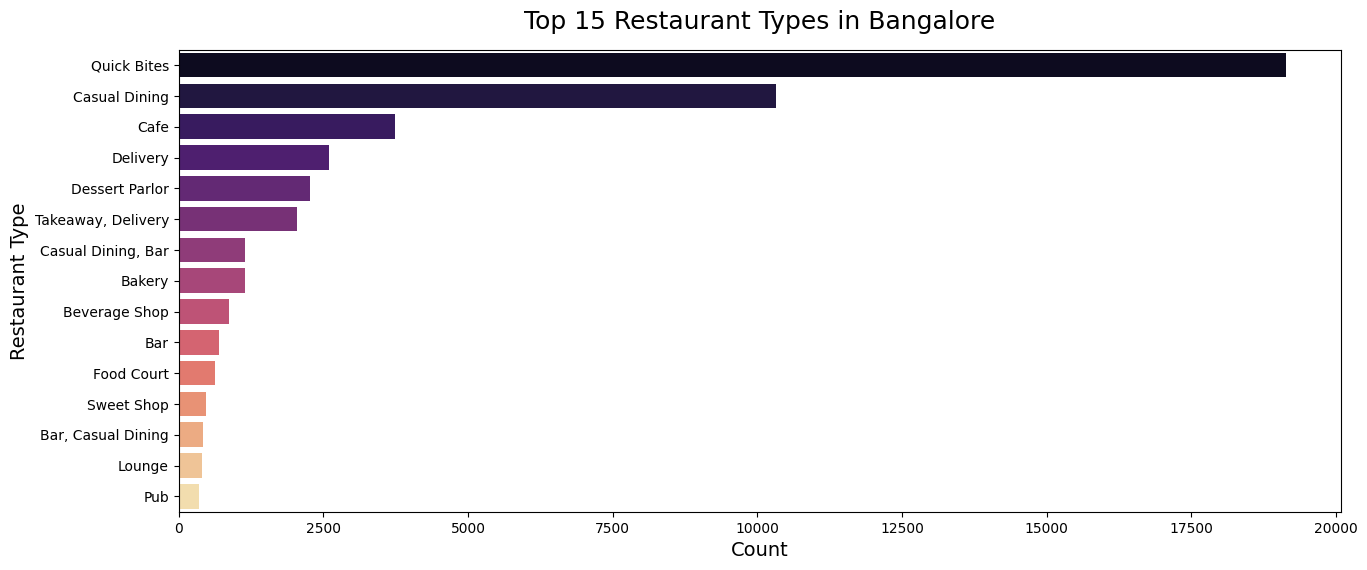

In [29]:
#viii) Top Restaurant Types
plt.figure(figsize=(15,6))
rest_type = zomato_orgnl['rest_type'].value_counts()[:15]
sns.barplot(x=rest_type.values, y=rest_type.index, palette='magma')
plt.title('Top 15 Restaurant Types in Bangalore', fontsize=18, pad=15)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Restaurant Type', fontsize=14)
plt.show()



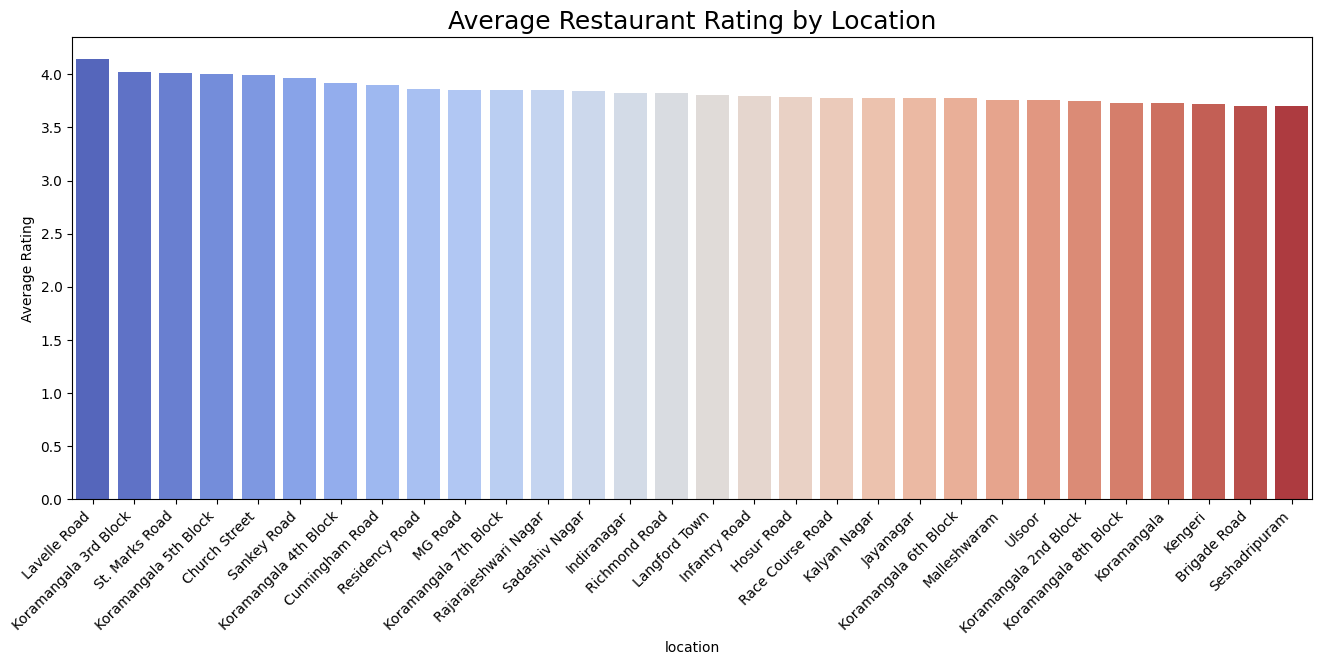

In [22]:
#ix) Average Rating by Location
plt.figure(figsize=(16,6))
avg_rating = zomato.groupby('location')['rate'].mean().sort_values(ascending=False)[:30]
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="coolwarm")
plt.title('Average Restaurant Rating by Location', size=18)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Rating')
plt.show()


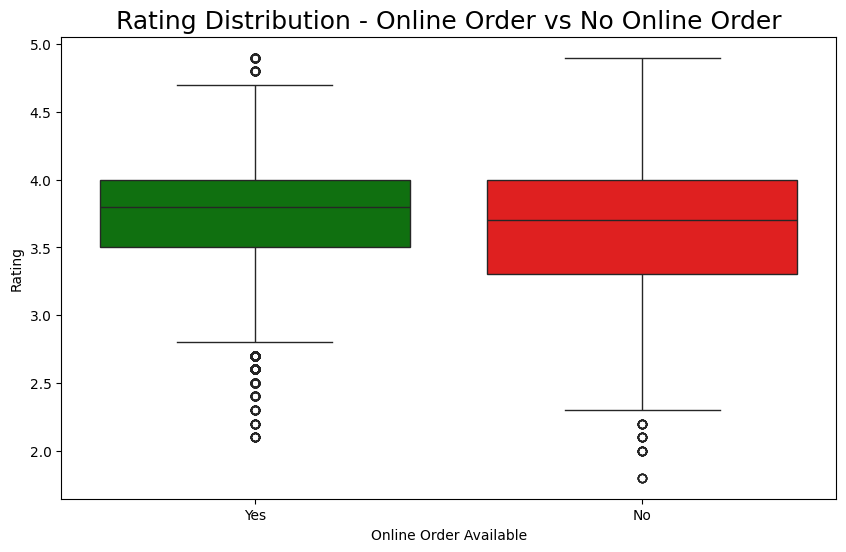

In [24]:
# x) Rating Distribution by Online Order Availability
plt.figure(figsize=(10,6))
sns.boxplot(x='online_order', y='rate', data=zomato, palette=['green', 'red'])
plt.title('Rating Distribution - Online Order vs No Online Order', size=18)
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.show()


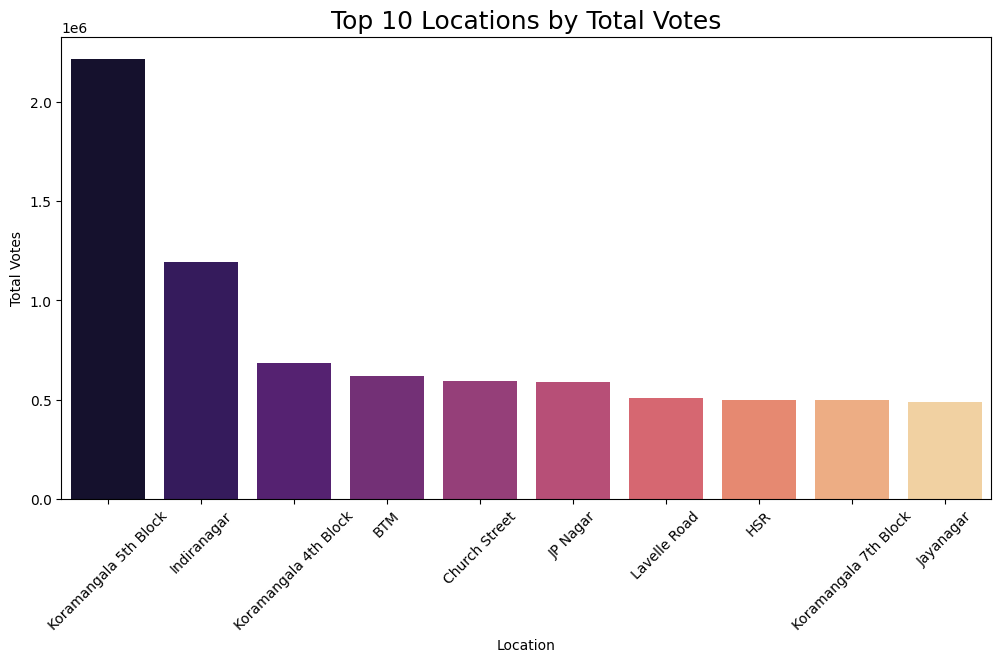

In [27]:
#xi) Top 10 Location with Highest Votes
plt.figure(figsize=(12,6))
top_votes = zomato.groupby('location')['votes'].sum().sort_values(ascending=False)[:10]
sns.barplot(x=top_votes.index, y=top_votes.values, palette='magma')
plt.title('Top 10 Locations by Total Votes', size=18)
plt.xlabel('Location')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)
plt.show()


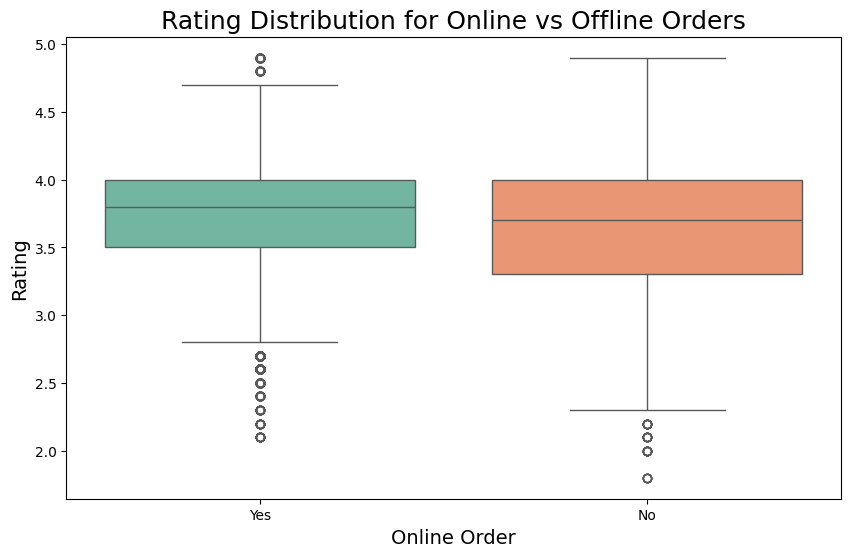

In [ ]:
#xii) Online vs Offline Orders with Rating

plt.figure(figsize=(10,6))
sns.boxplot(x='online_order', y='rate', data=zomato, palette='Set2')
plt.title('Rating Distribution for Online vs Offline Orders', fontsize=18)
plt.xlabel('Online Order', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()


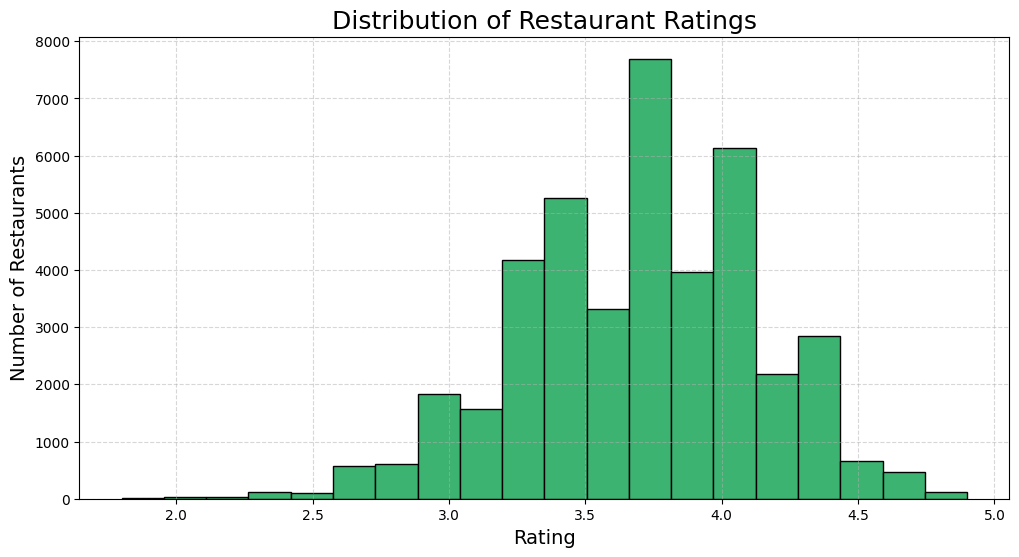

In [ ]:
#xiii) Distribution of Restaurant Ratings
plt.figure(figsize=(12,6))
plt.hist(zomato['rate'], bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Restaurant Ratings', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Splitting dataset into train & test

In [ ]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)


In [ ]:
#Applying LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.30214916589616436

With LINEAR REGRESSION, we are getting an accuracy of 30 %

In [ ]:
#Applying DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
print('r2_score of test data:',r2_score( y_test,y_predict))
ypred_train = DTree.predict(x_train)
print('r2_score of train data:',r2_score( y_train,ypred_train))


r2_score of test data: 0.8414227823928175
r2_score of train data: 0.919944115047409


With DECISION TREE REGRESSION, we are getting an accuracy of 84 %

In [ ]:
#Applying RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
print('r2_score of test data:',r2_score(y_test,y_predict))

#checking r2_score on train data
ypred_train=RForest.predict(x_train)
print('r2_score of train data:',r2_score(y_train, ypred_train))

r2_score of test data: 0.8546528178074226
r2_score of train data: 0.9012869532407402


With RANDOM FOREST REGRESSION, we are getting an accuracy of 85 % which is better

In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 50],
    'max_depth': [1, 50, 100, 150, 200],
}

rf = RandomForestRegressor()
rf_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, scoring='r2', cv=5, n_jobs=-1, verbose=3)
rf_search.fit(x_train, y_train)

best_rf = rf_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Tuned R2 Score:", r2_score(y_test, y_pred))

#checking r2_score on train data
ypred_train=best_rf.predict(x_train)
print('r2_score of train data:',r2_score(y_train, ypred_train))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned R2 Score: 0.9421392845686336
r2_score of train data: 0.9905413938903327


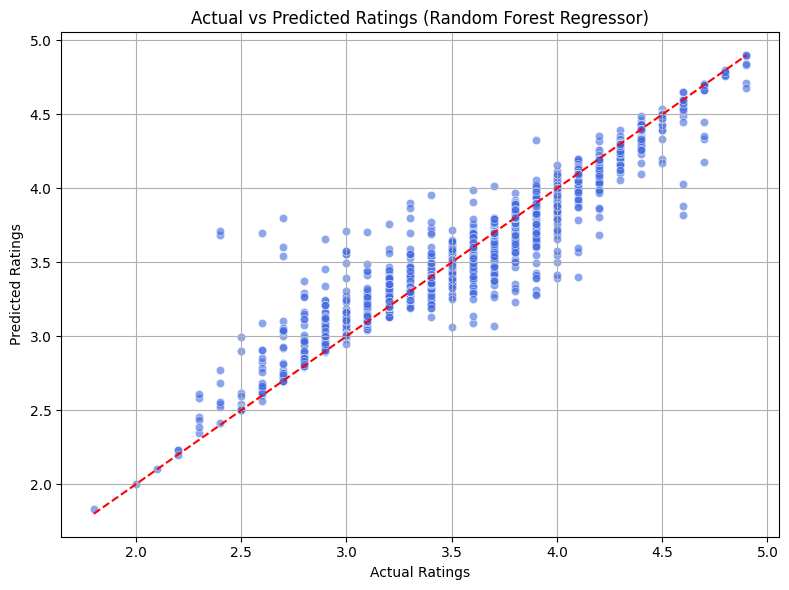

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred = best_rf.predict(x_test)

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # reference line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Random Forest Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()

Before tuning, the RandomForestRegressor model likely had suboptimal hyperparameters, leading to underfitting (hence, 85% test accuracy).After tuning with RandomizedSearchCV, the model generalized better, improving test accuracy to 94%.
However, a 5% gap between training (99%) and test (94%) still indicates slight overfitting. Let us try XGBoost, which is better at handling overfitting due to its built-in regularization techniques.

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0
)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print("XGBoost R²:", r2_score(y_test, y_pred))


XGBoost R²: 0.6591517567124183


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1.0, 2.0]
}

xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist, 
                                 n_iter=20, cv=5, scoring='r2', 
                                 verbose=2, n_jobs=-1)
xgb_search.fit(x_train, y_train)

best_xgb = xgb_search.best_estimator_
y_pred = best_xgb.predict(x_test)

print("Tuned XGBoost R²:", r2_score(y_test, y_pred))
print("Train R²:", r2_score(y_train, best_xgb.predict(x_train)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Tuned XGBoost R²: 0.9295115986759456
Train R²: 0.978746499158354


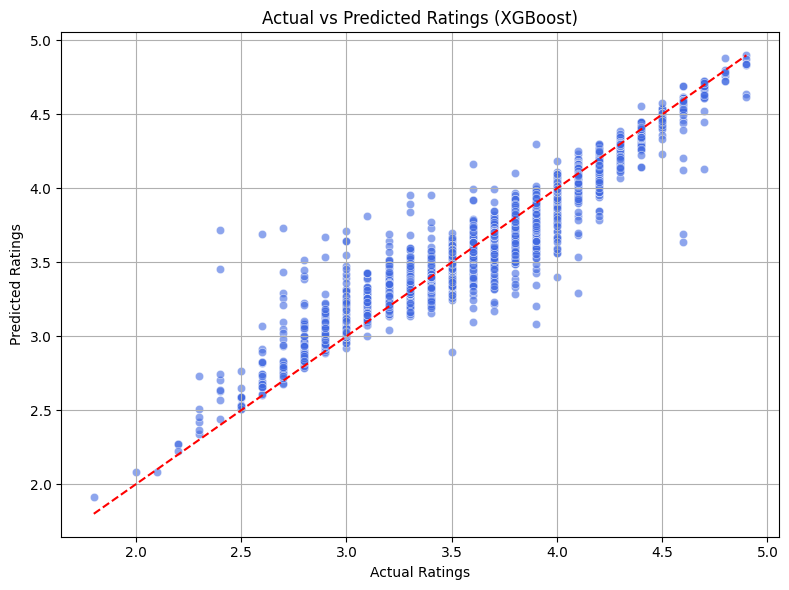

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
y_pred = best_xgb.predict(x_test)

# Create the plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # reference line
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()


During the XGBoost RandomizedSearchCV, i included:

-reg_alpha: L1 regularization to reduce feature impact.

-reg_lambda: L2 regularization to penalize complexity.

-subsample & colsample_bytree: To introduce randomness and reduce overfitting.

-Cross-validation (cv=5) helped assess model generalization, reducing reliance on just the train-test split.

Both Random Forest (tuned) and XGBoost (tuned) performed exceptionally well.

If model interpretability is more important → ✅ Go with Random Forest

If you want more control over regularization and fine-tuning → ✅ Go with XGBoost